In [2]:
from os import path, makedirs
from pickle import dump, load
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from haea import HAEA
from real_haea import RealHAEA
from constants import PROPORTIONAL_SELECTION, RANK_SELECTION

# Utils

In [14]:
ITERATIONS = 100
CHROMOSOME_LENGTH = 100
POPULATION_LENGTH = 100
GENERATIONS = 100

In [15]:
def save( name, data ):
    filename = "data/" + name + ".pickle"
    if not path.exists( path.dirname( filename ) ):
        makedirs( path.dirname( filename ) )
    dump( data, open( filename, "wb" ) )

In [16]:
def get( name ):
    return load( open( "data/" + name + ".pickle", "rb" ) )

In [17]:
def getStandardDeviation( data, step ):
    x = range( 0, ITERATIONS, step )
    y = numpy.empty( 0 )
    d = numpy.empty( 0 )
    for i in x:
        median = numpy.median( data[:, i] )
        y = numpy.append( y, median )
        d = numpy.append( d, numpy.sqrt( numpy.sum( ( data[:, i] - median ) ** 2 ) / ITERATIONS ) )

    return x, y, d

In [18]:
def standarDeviation(x):
    return numpy.sqrt(numpy.sum((x-numpy.median(x))**2)/len(x))

In [19]:
def plot( data ):
    plt.close()
    tempData = []
    for iteration in data:
        newData = []
        for i in range( len( iteration ) ):
            newData.append( iteration[i].fitness )
        newData = numpy.array( newData )
        tempData.append( newData )
    data = numpy.array( tempData )
    plt.plot( list( range( ITERATIONS ) ), numpy.average( data, axis = 0 ), label = "Average" )
    plt.plot( list( range( ITERATIONS ) ), numpy.median( data, axis = 0 ), label = "Median" )
    plt.plot( list( range( ITERATIONS ) ), numpy.min( data, axis = 0 ), label = "Minimum" )
    plt.plot( list( range( ITERATIONS ) ), numpy.max( data, axis = 0 ), label = "Maximum" )
    x, y, d = getStandardDeviation( data, int( ITERATIONS / 10 ) )
    plt.errorbar(x, y, d, marker='^', ls='None')

    plt.legend(loc='upper right', shadow=True, fontsize = "xx-small")
    plt.xlabel('generation')
    plt.ylabel('fitness')

# Functions

## Real functions

## Binary functions

In [20]:
def maxOnes( chromosome ):
    count = 0
    while( chromosome ):
        count += chromosome & 1
        chromosome >>= 1

    return count

In [21]:
def deceptive4( chromosome ):
    count = 0
    if chromosome == 0:
        return CHROMOSOME_LENGTH + 1
    while( chromosome ):
        count += chromosome & 1
        chromosome >>= 1
    return count

# HAEA

## Max Ones

In [1]:
haea = HAEA( maxOnes, CHROMOSOME_LENGTH, POPULATION_LENGTH )

NameError: name 'HAEA' is not defined

### Proportial selection

In [23]:
haeaWithProportionalInMaxOnes = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, PROPORTIONAL_SELECTION )
    haeaWithProportionalInMaxOnes.append( data )
#save( "haeaWithProportionalInMaxOnes", haeaWithProportionalInMaxOnes )
#haeaWithProportionalInMaxOnes = get( "haeaWithProportionalInMaxOnes" )

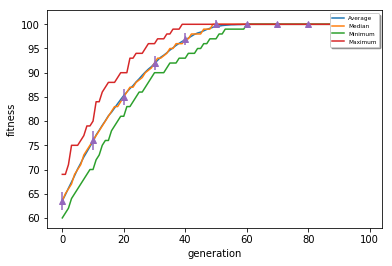

In [24]:
plot( haeaWithProportionalInMaxOnes )

In [25]:
results = numpy.array([haeaWithProportionalInMaxOnes[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 100.0
Standard Deviation: 0.0


### Rank selection

In [26]:
haeaWithRankInMaxOnes = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, RANK_SELECTION )
    haeaWithRankInMaxOnes.append( data )
#save( "haeaWithRankInMaxOnes", haeaWithRankInMaxOnes )
#haeaWithRankInMaxOnes = get( "haeaWithRankInMaxOnes" )

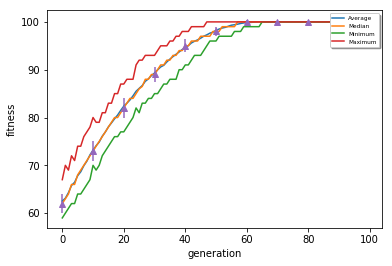

In [27]:
plot( haeaWithRankInMaxOnes )

In [28]:
results = numpy.array([haeaWithRankInMaxOnes[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 100.0
Standard Deviation: 0.0


### Tournament selection

In [29]:
haeaWithTournamentInMaxOnes = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, "tournament" )
    haeaWithTournamentInMaxOnes.append( data )
#save( "haeaWithRankInMaxOnes", haeaWithRankInMaxOnes )
#haeaWithRankInMaxOnes = get( "haeaWithRankInMaxOnes" )

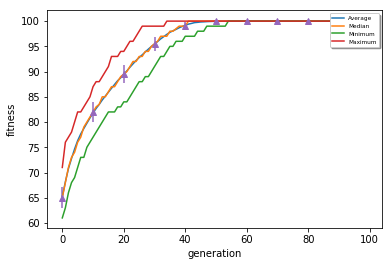

In [30]:
plot( haeaWithTournamentInMaxOnes )

In [31]:
results = numpy.array([haeaWithTournamentInMaxOnes[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 100.0
Standard Deviation: 0.0


### Elitist Selection

In [32]:
haeaWithElitismInMaxOnes = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, "elitist" )
    haeaWithElitismInMaxOnes.append( data )
#save( "haeaWithRankInMaxOnes", haeaWithRankInMaxOnes )
#haeaWithRankInMaxOnes = get( "haeaWithRankInMaxOnes" )

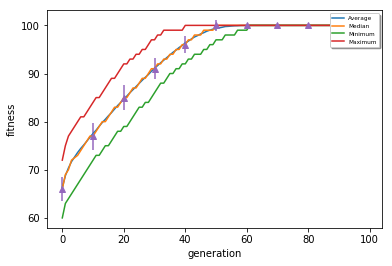

In [33]:
plot( haeaWithElitismInMaxOnes )

In [34]:
results = numpy.array([haeaWithElitismInMaxOnes[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 100.0
Standard Deviation: 0.0


## Deceptive-4

In [35]:
CHROMOSOME_LENGTH = 40
haea = HAEA( deceptive4, CHROMOSOME_LENGTH, POPULATION_LENGTH )

### Proportional selection

In [36]:
haeaWithProportionalInDeceptive4 = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, PROPORTIONAL_SELECTION )
    haeaWithProportionalInDeceptive4.append( data )
#save( "haeaWithProportionalInDeceptive4", haeaWithProportionalInDeceptive4 )
#haeaWithProportionalInDeceptive4 = get( "haeaWithProportionalInDeceptive4" )

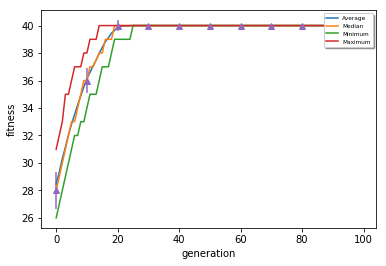

In [37]:
plot( haeaWithProportionalInDeceptive4 )

In [38]:
results = numpy.array([haeaWithProportionalInDeceptive4[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 40.0
Standard Deviation: 0.0


### Rank selection

In [39]:
haeaWithRankInDeceptive4 = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, RANK_SELECTION )
    haeaWithRankInDeceptive4.append( data )
#save( "haeaWithRankInDeceptive4", haeaWithRankInDeceptive4 )
#haeaWithRankInDeceptive4 = get( "haeaWithRankInDeceptive4" )

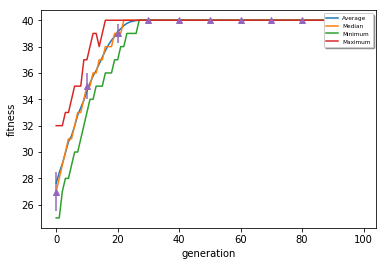

In [40]:
plot( haeaWithRankInDeceptive4 )

In [41]:
results = numpy.array([haeaWithRankInDeceptive4[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 40.0
Standard Deviation: 0.0


### Tournament selection

In [42]:
haeaWithTournamentInDeceptive4 = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, "tournament" )
    haeaWithTournamentInDeceptive4.append( data )
#save( "haeaWithRankInDeceptive4", haeaWithRankInDeceptive4 )
#haeaWithRankInDeceptive4 = get( "haeaWithRankInDeceptive4" )

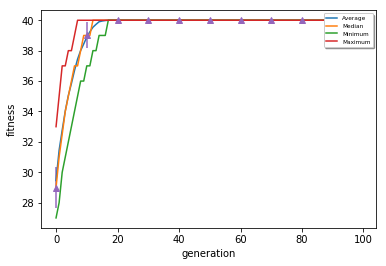

In [43]:
plot( haeaWithTournamentInDeceptive4 )

In [44]:
results = numpy.array([haeaWithTournamentInDeceptive4[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 40.0
Standard Deviation: 0.0


### Elitist selection

In [45]:
haeaWithElitismInDeceptive4 = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, "elitist" )
    haeaWithElitismInDeceptive4.append( data )
#save( "haeaWithRankInDeceptive4", haeaWithRankInDeceptive4 )
#haeaWithRankInDeceptive4 = get( "haeaWithRankInDeceptive4" )

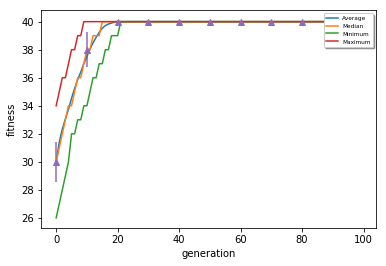

In [46]:
plot( haeaWithElitismInDeceptive4 )

In [47]:
results = numpy.array([haeaWithElitismInDeceptive4[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 40.0
Standard Deviation: 0.0


# Real encoding

## Functions

In [48]:
def Rastrigin(x):
    A = 10
    d = len(x)
    return A * d + numpy.sum(x**2 - A * numpy.cos(2*numpy.pi*x))

In [49]:
def Rosenbrock(x):
    return 100 * (x[0]**2-x[1])**2 + (1-x[0])**2

In [50]:
def Schwefel(x):
    d = len(x)
    return 418.9829 * d + numpy.sum(-x * numpy.sin(numpy.sqrt(numpy.abs(x))))

In [51]:
def Griewank(x):
    d = len(x)
    return 1 + numpy.sum(x**2 / 4000) - numpy.prod(numpy.cos(x/numpy.sqrt(numpy.arange(1,d+1))))

## Rastrigin

In [52]:
limits = [-5.12, 5.12]

haea = RealHAEA( Rastrigin, 10, 100, limits )

### Roulette Selection

In [53]:
haeaWithProportionalInRastrigin = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, PROPORTIONAL_SELECTION )
    haeaWithProportionalInRastrigin.append( data )
#save( "haeaWithProportionalInMaxOnes", haeaWithProportionalInMaxOnes )
#haeaWithProportionalInMaxOnes = get( "haeaWithProportionalInMaxOnes" )

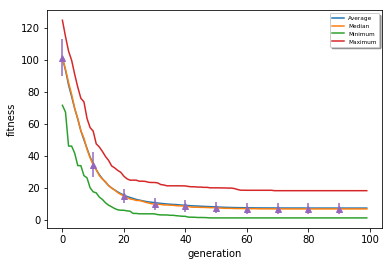

In [54]:
plot( haeaWithProportionalInRastrigin )

In [55]:
results = numpy.array([haeaWithProportionalInRastrigin[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 6.899842175597293
Standard Deviation: 3.418483266640477


### Rank Selection

In [56]:
haeaWithRankInRastrigin = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, RANK_SELECTION )
    haeaWithRankInRastrigin.append( data )
#save( "haeaWithProportionalInMaxOnes", haeaWithProportionalInMaxOnes )
#haeaWithProportionalInMaxOnes = get( "haeaWithProportionalInMaxOnes" )

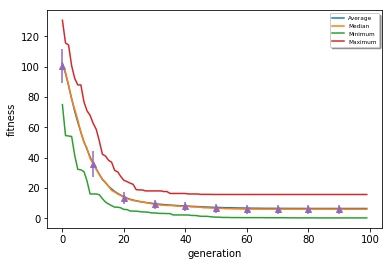

In [57]:
plot( haeaWithRankInRastrigin )

In [58]:
results = numpy.array([haeaWithRankInRastrigin[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 6.094637526968597
Standard Deviation: 2.9770461495555818


### Tournament Selection

In [59]:
haeaWithTournamentInRastrigin = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, "tournament" )
    haeaWithTournamentInRastrigin.append( data )
#save( "haeaWithProportionalInMaxOnes", haeaWithProportionalInMaxOnes )
#haeaWithProportionalInMaxOnes = get( "haeaWithProportionalInMaxOnes" )

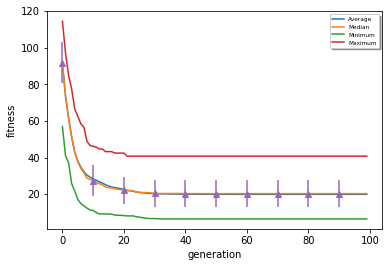

In [60]:
plot(haeaWithTournamentInRastrigin)

In [61]:
results = numpy.array([haeaWithTournamentInRastrigin[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 20.402988919709507
Standard Deviation: 7.215791880714663


### Elitist Selection

In [62]:
haeaWithElitismInRastrigin = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, "elitist" )
    haeaWithElitismInRastrigin.append( data )
#save( "haeaWithProportionalInMaxOnes", haeaWithProportionalInMaxOnes )
#haeaWithProportionalInMaxOnes = get( "haeaWithProportionalInMaxOnes" )

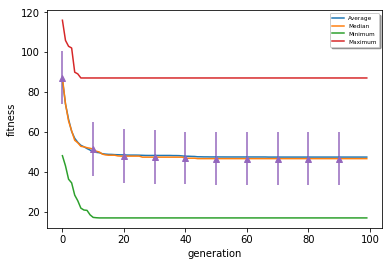

In [63]:
plot(haeaWithElitismInRastrigin)

In [64]:
results = numpy.array([haeaWithElitismInRastrigin[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 46.60057991795138
Standard Deviation: 13.125902995486834


## Rosenbrock

In [65]:
limits = [-2.048, 2.048]

haea = RealHAEA( Rosenbrock, 2, 100, limits )

### Roulette Selection

In [66]:
haeaWithRouletteInRosenbrock = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, PROPORTIONAL_SELECTION )
    haeaWithRouletteInRosenbrock.append( data )
#save( "haeaWithProportionalInMaxOnes", haeaWithProportionalInMaxOnes )
#haeaWithProportionalInMaxOnes = get( "haeaWithProportionalInMaxOnes" )

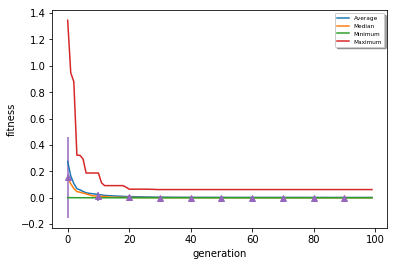

In [67]:
plot(haeaWithRouletteInRosenbrock)

In [68]:
results = numpy.array([haeaWithRouletteInRosenbrock[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 0.0005155130721840959
Standard Deviation: 0.007037403393306355


### Rank Selection

In [69]:
haeaWithRankInRosenbrock = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, RANK_SELECTION )
    haeaWithRankInRosenbrock.append( data )
#save( "haeaWithProportionalInMaxOnes", haeaWithProportionalInMaxOnes )
#haeaWithProportionalInMaxOnes = get( "haeaWithProportionalInMaxOnes" )

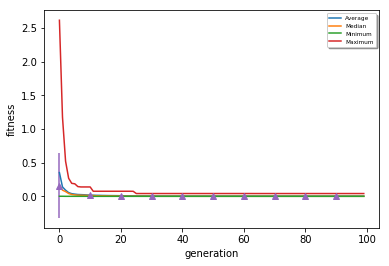

In [70]:
plot(haeaWithRankInRosenbrock)

In [71]:
results = numpy.array([haeaWithRankInRosenbrock[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 0.00041316177168088916
Standard Deviation: 0.0081841410162683


### Tournament Selection

In [72]:
haeaWithTournamentInRosenbrock = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, "tournament" )
    haeaWithTournamentInRosenbrock.append( data )
#save( "haeaWithProportionalInMaxOnes", haeaWithProportionalInMaxOnes )
#haeaWithProportionalInMaxOnes = get( "haeaWithProportionalInMaxOnes" )

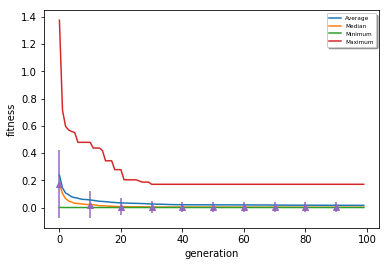

In [73]:
plot(haeaWithTournamentInRosenbrock)

In [74]:
results = numpy.array([haeaWithTournamentInRosenbrock[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 0.0021374321703824016
Standard Deviation: 0.034207538563120275


### Elitist Selection

In [75]:
haeaWithElitismInRosenbrock = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, "elitist" )
    haeaWithElitismInRosenbrock.append( data )
#save( "haeaWithProportionalInMaxOnes", haeaWithProportionalInMaxOnes )
#haeaWithProportionalInMaxOnes = get( "haeaWithProportionalInMaxOnes" )

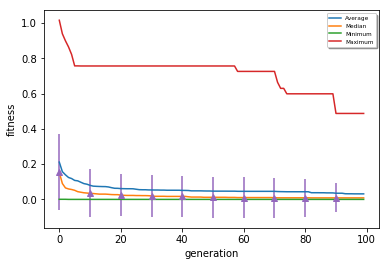

In [76]:
plot(haeaWithElitismInRosenbrock)

In [77]:
results = numpy.array([haeaWithElitismInRosenbrock[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 0.008665539548199538
Standard Deviation: 0.07341645386275446


## Schwefel

In [78]:
limits = [-512, 512]

haea = RealHAEA( Schwefel, 10, 100, limits )

### Roulette

In [79]:
haeaWithRouletteInSchwefel = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, PROPORTIONAL_SELECTION )
    haeaWithRouletteInSchwefel.append( data )
#save( "haeaWithProportionalInMaxOnes", haeaWithProportionalInMaxOnes )
#haeaWithProportionalInMaxOnes = get( "haeaWithProportionalInMaxOnes" )

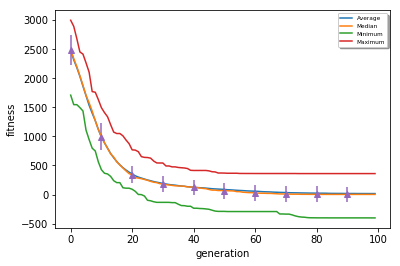

In [80]:
plot(haeaWithRouletteInSchwefel)

In [81]:
results = numpy.array([haeaWithRouletteInSchwefel[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 2.4380254885249997
Standard Deviation: 133.20055208921434


### Rank

In [82]:
haeaWithRankInSchwefel = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, RANK_SELECTION )
    haeaWithRankInSchwefel.append( data )
#save( "haeaWithProportionalInMaxOnes", haeaWithProportionalInMaxOnes )
#haeaWithProportionalInMaxOnes = get( "haeaWithProportionalInMaxOnes" )

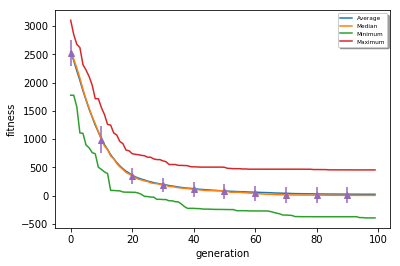

In [83]:
plot(haeaWithRankInSchwefel)

In [84]:
results = numpy.array([haeaWithRankInSchwefel[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 3.7586087322556523
Standard Deviation: 141.22544435176957


### Tournament

In [85]:
haeaWithTournamentInSchwefel = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, "tournament" )
    haeaWithTournamentInSchwefel.append( data )
#save( "haeaWithProportionalInMaxOnes", haeaWithProportionalInMaxOnes )
#haeaWithProportionalInMaxOnes = get( "haeaWithProportionalInMaxOnes" )

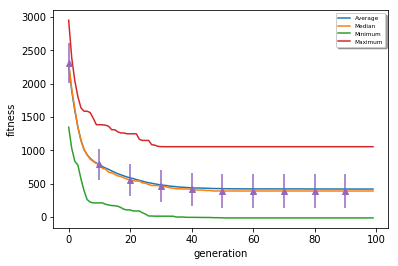

In [86]:
plot(haeaWithTournamentInSchwefel)

In [87]:
results = numpy.array([haeaWithTournamentInSchwefel[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 389.63080890754486
Standard Deviation: 252.23304839444666


### Elitist

In [88]:
haeaWithElitismInSchwefel = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, "elitist" )
    haeaWithElitismInSchwefel.append( data )
#save( "haeaWithProportionalInMaxOnes", haeaWithProportionalInMaxOnes )
#haeaWithProportionalInMaxOnes = get( "haeaWithProportionalInMaxOnes" )

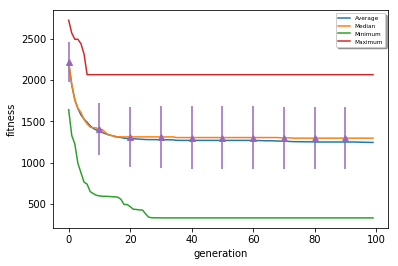

In [89]:
plot(haeaWithElitismInSchwefel)

In [90]:
results = numpy.array([haeaWithElitismInSchwefel[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 1298.2272937312837
Standard Deviation: 382.17319564788005


## Griewank

In [91]:
limits = [-600, 600]

haea = RealHAEA( Griewank, 10, 100, limits )

### Roulette

In [92]:
haeaWithRouletteInGriewank = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, PROPORTIONAL_SELECTION )
    haeaWithRouletteInGriewank.append( data )
#save( "haeaWithProportionalInMaxOnes", haeaWithProportionalInMaxOnes )
#haeaWithProportionalInMaxOnes = get( "haeaWithProportionalInMaxOnes" )

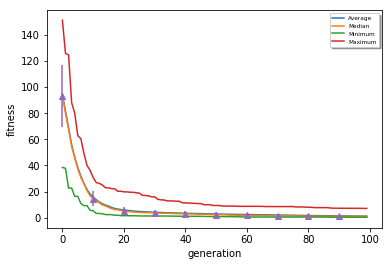

In [93]:
plot(haeaWithRouletteInGriewank)

In [94]:
results = numpy.array([haeaWithRouletteInGriewank[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 1.0034673427098129
Standard Deviation: 0.9816094303051555


### Rank

In [95]:
haeaWithRankInGriewank = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, RANK_SELECTION )
    haeaWithRankInGriewank.append( data )
#save( "haeaWithProportionalInMaxOnes", haeaWithProportionalInMaxOnes )
#haeaWithProportionalInMaxOnes = get( "haeaWithProportionalInMaxOnes" )

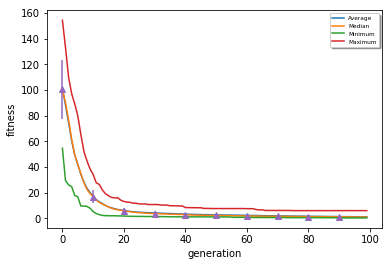

In [96]:
plot(haeaWithRankInGriewank)

In [97]:
results = numpy.array([haeaWithRankInGriewank[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 0.9235077622466059
Standard Deviation: 0.7689695674760619


### Tournament

In [98]:
haeaWithTournamentInGriewank = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, "tournament" )
    haeaWithTournamentInGriewank.append( data )
#save( "haeaWithProportionalInMaxOnes", haeaWithProportionalInMaxOnes )
#haeaWithProportionalInMaxOnes = get( "haeaWithProportionalInMaxOnes" )

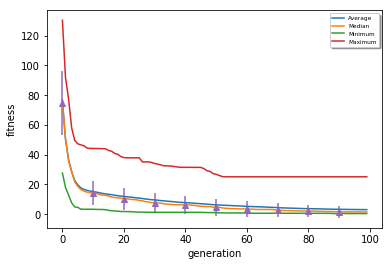

In [99]:
plot(haeaWithTournamentInGriewank)

In [100]:
results = numpy.array([haeaWithTournamentInGriewank[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 1.5086423257786765
Standard Deviation: 4.0599525873174125


### Elitist

In [101]:
haeaWithElitismInGriewank = []
for i in range( ITERATIONS ):
    data = haea.init( GENERATIONS, "elitist" )
    haeaWithElitismInGriewank.append( data )
#save( "haeaWithProportionalInMaxOnes", haeaWithProportionalInMaxOnes )
#haeaWithProportionalInMaxOnes = get( "haeaWithProportionalInMaxOnes" )

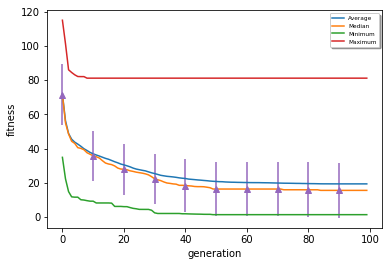

In [104]:
plot(haeaWithElitismInGriewank)

In [105]:
results = numpy.array([haeaWithElitismresults = numpy.array([haeaWithTournamentInGriewank[i][99].fitness for i in range(100)])
print("Mean: {}".format(numpy.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))InGriewank[i][99].fitness for i in range(100)])

SyntaxError: invalid syntax (<ipython-input-105-a1d4ecb2f083>, line 1)

# DETERMINISTIC CROWDING - HAEA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from real_haea import RealHAEA

In [3]:
def sin2(x):
    return np.sin(2*np.pi*x)

In [4]:
x = np.linspace(0, 5, 400)
y = sin2(x)

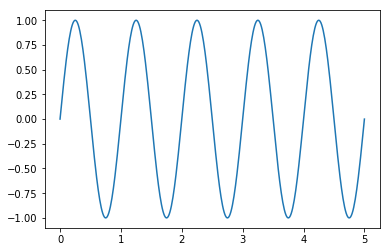

In [5]:
plt.plot(x, y)

In [6]:
limits = [0, 5]
haea_dc = RealHAEA(sin2, 1, 100, limits) 

In [7]:
x1 = haea_dc.init(100, "rank")

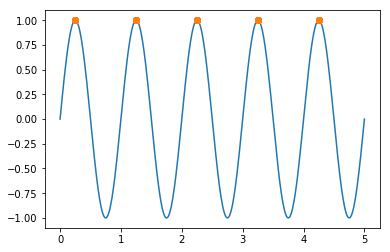

In [8]:
plt.plot(x,y)
plt.plot([i.chromosome[0] for i in x1], [sin2(i.chromosome) for i in x1], 'o')

In [9]:
print([i.fitness for i in x1])

[array([1.]), array([1.]), array([0.99999797]), array([0.99999908]), array([1.]), array([1.]), array([0.99999591]), array([0.99999994]), array([1.]), array([1.]), array([1.]), array([0.99999996]), array([1.]), array([0.99999998]), array([0.99999238]), array([0.99999944]), array([0.99999996]), array([0.99999936]), array([0.99999482]), array([0.99999945]), array([0.99999999]), array([0.99999659]), array([1.]), array([0.99999997]), array([0.99999986]), array([1.]), array([0.99999992]), array([0.99997492]), array([0.99999991]), array([1.]), array([0.9999999]), array([1.]), array([0.99999342]), array([0.9999999]), array([0.9999256]), array([0.99998698]), array([0.99999999]), array([0.99999982]), array([1.]), array([0.99999998]), array([0.99999991]), array([0.99998326]), array([0.99998242]), array([0.99999873]), array([0.99999876]), array([0.99999066]), array([1.]), array([0.99999988]), array([0.99996034]), array([1.]), array([0.99999902]), array([0.99999999]), array([0.99999926]), array([0.

In [12]:
import numpy as np

In [13]:
a = [1,3,4,6,575,24,6,72,14,55]

In [3]:
np.ufunc.reduce?